In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
train_df=pd.read_csv('/content/train.csv')
test_df=pd.read_csv('/content/test.csv')

In [ ]:
train_df.shape

(891, 12)

In [ ]:
test_df.shape

(418, 11)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.skew(numeric_only=True)

,0
PassengerId,0.000000
Survived,0.478523
Pclass,-0.630548
Age,0.389108
SibSp,3.695352
Parch,2.749117
Fare,4.787317


In [ ]:
profile = ProfileReport(train_df)
profile.to_file(output_file='Pre_Profiling_Report.html')
print("Successfully generated profile report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 41.91it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Successfully generated profile report


In [ ]:
#from google.colab import files
#files.download('Pre_Profiling_Report.html')

In [ ]:
train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace=True)
train_df.drop(labels='Cabin',axis=1,inplace=True)

/tmp/ipython-input-2692053420.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)
/tmp/ipython-input-2692053420.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
train_df['Embarked'].mode()[0]

'S'

In [ ]:
train_df['Embarked'].mode()

,Embarked
0,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
profile = ProfileReport(train_df)
profile.to_file(output_file='Post_Profiling_Report.html')
print("Successfully generated profile report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:00<00:00, 20.10it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Successfully generated profile report


In [ ]:
#from google.colab import files
#files.download('Post_Profiling_Report.html')

## Exploratory Data Analytics

In [ ]:
train_df['Family_size'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.')
train_df.head()

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-548965149.py:2: SyntaxWarning: invalid escape sequence '\.'
  train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Mr


In [ ]:
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [ ]:
pd.crosstab(index=train_df['Sex'], columns=train_df['Title'])

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
train_df['Title'].replace(to_replace=['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],
                      value=['Miss', 'Miss', 'Miss', 'Other', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'],
                      inplace=True)

/tmp/ipython-input-1036872167.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Title'].replace(to_replace=['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],


In [ ]:
pd.crosstab(index=train_df['Sex'], columns=train_df['Title'])

Title,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,0,127,1
male,40,0,522,0,15


## What is the relationship between age and title of the passengers?

<Figure size 1500x700 with 0 Axes>

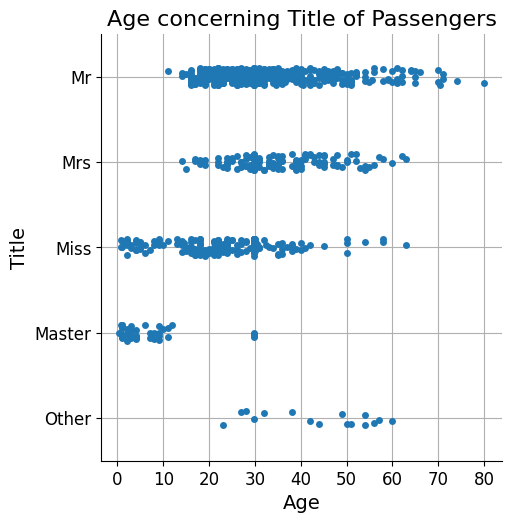

In [ ]:
paper = plt.figure(figsize=[15,7])
sns.catplot(data=train_df, x="Age", y="Title")
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Title', size=14)
plt.title(label='Age concerning Title of Passengers', size=16)
plt.grid(visible=True)
plt.show()

## Does title play important role in the survival of passengers??

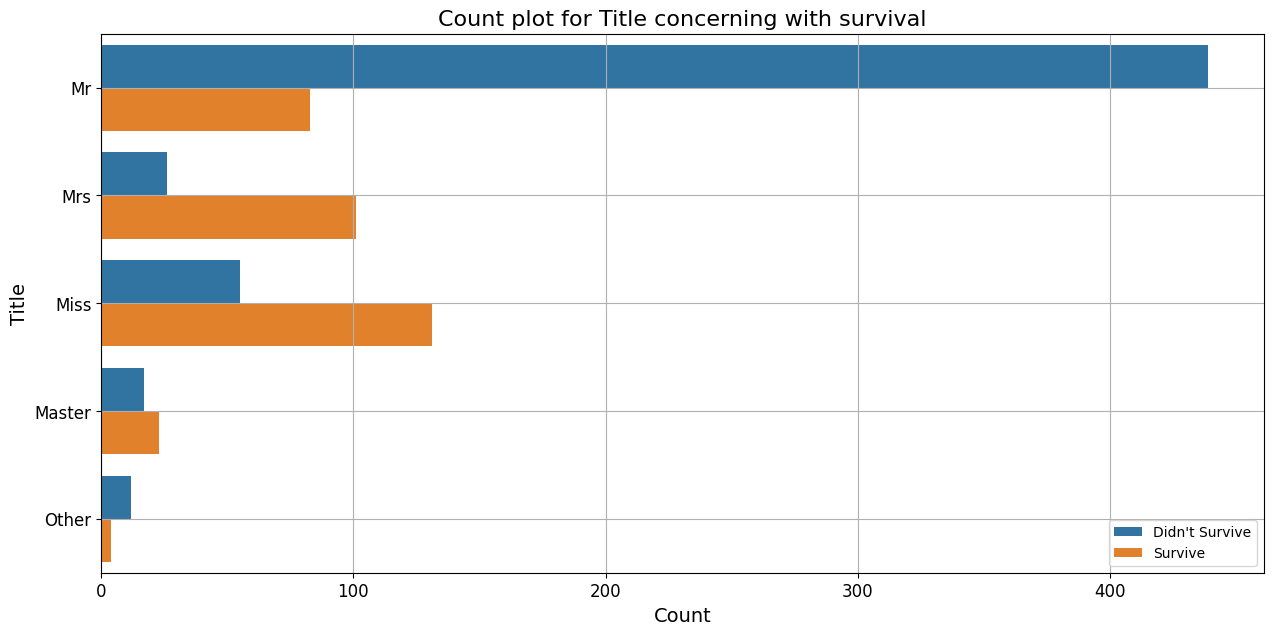

In [ ]:
paper = plt.figure(figsize=[15,7])
sns.countplot(train_df, y="Title", hue="Survived")
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel(xlabel="Count", size=14)
plt.ylabel(ylabel='Title', size=14)
plt.title(label="Count plot for Title concerning with survival", size=16)
plt.legend(labels=["Didn't Survive", "Survive"])
plt.grid(visible=True)

## Data Post Processing

In [ ]:
train_data = pd.get_dummies(train_df, columns=['Sex', 'Embarked', 'Title'])
train_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Family_size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,False,True,False,False,True,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,True,False,True,False,False,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,True,False,False,False,True,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,True,False,False,False,True,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,False,True,False,False,True,False,False,True,False,False


In [ ]:
x = train_data.drop(labels=['PassengerId', 'Name', 'Ticket','Age' ,'Survived','Fare'], axis=1)
y = train_data['Survived']

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_data[['Age','Fare']])
data2 = pd.DataFrame(scaled_data, columns=['Age','Fare'])
data2.head()

,Age,Fare
0,-0.592481,-0.502445
1,0.638789,0.786845
2,-0.284663,-0.488854
3,0.407926,0.420730
4,0.407926,-0.486337


In [ ]:
train_x = pd.concat([x, data2], axis=1)
train_x.head()

,Pclass,SibSp,Parch,Family_size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Age,Fare
0,3,1,0,2,False,True,False,False,True,False,False,True,False,False,-0.592481,-0.502445
1,1,1,0,2,True,False,True,False,False,False,False,False,True,False,0.638789,0.786845
2,3,0,0,1,True,False,False,False,True,False,True,False,False,False,-0.284663,-0.488854
3,1,1,0,2,True,False,False,False,True,False,False,False,True,False,0.407926,0.420730
4,3,0,0,1,False,True,False,False,True,False,False,True,False,False,0.407926,-0.486337


## Data Preparation

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_x,y,test_size=0.20,random_state=42,stratify=y)
print(f"x_train.shape ::: {x_train.shape}")
print(f"x_test.shape ::: {x_test.shape}")
print(f"y_train.shape ::: {y_train.shape}")
print(f"y_test.shape ::: {y_test.shape}")

x_train.shape ::: (712, 16)
x_test.shape ::: (179, 16)
y_train.shape ::: (712,)
y_test.shape ::: (179,)


In [ ]:
clf = RandomForestClassifier(random_state=42,class_weight='balanced')
clf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred_train = clf.predict(x_train)

In [ ]:
y_pred_test = clf.predict(x_test)

In [ ]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       439
           1       0.99      0.97      0.98       273

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712



In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



In [ ]:
importance = clf.feature_importances_
importance

array([0.06489264, 0.0346896 , 0.02191448, 0.05185938, 0.07622401,
       0.0694414 , 0.01259074, 0.00653402, 0.01427334, 0.01036621,
       0.03585527, 0.11590631, 0.0239876 , 0.00608081, 0.21005706,
       0.24532713])

In [ ]:
imp_df = pd.DataFrame(importance*100, index=x_train.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
imp_df

,Importance
Fare,24.532713
Age,21.005706
Title_Mr,11.590631
Sex_female,7.622401
Sex_male,6.944140
Pclass,6.489264
Family_size,5.185938
Title_Miss,3.585527
SibSp,3.468960
Title_Mrs,2.398760


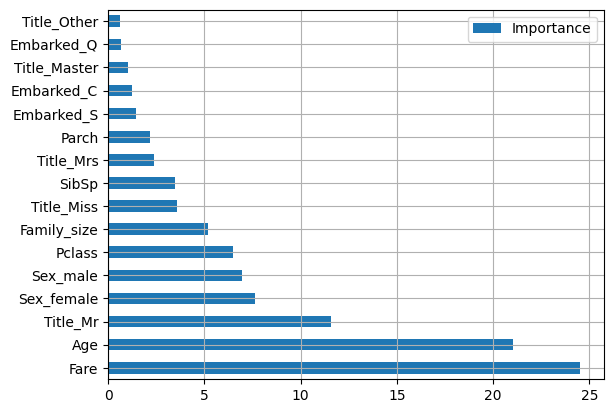

In [ ]:
imp_df.plot.barh()
plt.grid(visible=True)

### Hyper Parameter Optimized Model Development and Evaluation

In [ ]:
param_grid = {"max_depth": range(2,5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [100, 400, 700, 1000, 1500],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
random_search = RandomizedSearchCV(estimator=clf,
                                   param_distributions=param_grid,
                                   n_iter=50,
                                   n_jobs=-1)

random_search.fit(x_train, y_train)
y_train_pred_count = random_search.predict(x_train)
y_test_pred_count = random_search.predict(x_test)

In [ ]:
print(classification_report(y_train,y_train_pred_count))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       439
           1       0.81      0.75      0.78       273

    accuracy                           0.84       712
   macro avg       0.83      0.82      0.82       712
weighted avg       0.84      0.84      0.84       712



In [ ]:
print(classification_report(y_test, y_test_pred_count))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       110
           1       0.81      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

